# Analysis
* Observed Trend 1:
    Temperatures dip down (Climate get more colder) as we move up towards the northern hemisphere, 
    compared to the temperatures as we move down towards southern hemisphere.
* Observed Trend 2:
    The warmer the temperatures are the more humid the cities are.  Looking at the two plots "latitude vs temperature"
    and "latitude vs humidity", the cooler the temperatues are, the humidity numbers tend to be a little lower.
* Observed Trend 3:
    A look at all the trends plotted, tell us that Latitude has direct affect on the temperatures and not so much on
    humidity, cloudiness and windspeed directly. These 3 (humidity, cloudiness and windspeed) are more directly 
    related to temperatures, which we can have more concluded results if we were to plot these 3 variables against 
    temperatures rather than against Latitude.

In [1]:
# import dependencies
import random # random to generate random latitude and longitudes
import pandas as pd # pandas library
import time 
import seaborn as sns # seaborn library to set the aesthetics for the graphs
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
from datetime import datetime
import openweathermapy as owm

In [2]:
import csv

# Generate cities list

In [3]:
# citypy library - to Look up for city names with geo-coordinates
from citipy import citipy 
cities = []

while len(cities)<600:
    x = (random.choice(range(-90,90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)

* Number of unique cities generted

In [4]:
len(cities)

600

# Perform API Calls

* Initialize WeatherPy Data Frame to store weather data for the cities generated.

In [5]:
# import API Key from config file
from config import api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

* Perform API calls and send retrieved data to the WeatherPy data frame

In [6]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 2 of Set 0 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous%20virieux&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 3 of Set 0 | parfino
http://api.openweathermap.org/data/2.5/weather?q=parfino&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 4 of Set 0 | boguchany
http://api.openweathermap.org/data/2.5/weather?q=boguchany&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 5 of Set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 6 of Set 0 | ambon
http://api.openweathermap.org/data/2.5/weather?q=ambon&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 7 of Set 0 |

Processing Record 3 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 4 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 5 of Set 1 | gazojak
http://api.openweathermap.org/data/2.5/weather?q=gazojak&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 6 of Set 1 | yatou
http://api.openweathermap.org/data/2.5/weather?q=yatou&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 7 of Set 1 | muborak
http://api.openweathermap.org/data/2.5/weather?q=muborak&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 8 of Set 1 | paradwip
http://api.openweathermap.org/data/2.5/weather?q=paradwip&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
HTTP Error 404: Not Found
Processing Record 9 of Set 1 | mogadishu
http://api.openweathermap.org/d

HTTP Error 404: Not Found
Processing Record 6 of Set 2 | berberati
http://api.openweathermap.org/data/2.5/weather?q=berberati&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 7 of Set 2 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 8 of Set 2 | la palma
http://api.openweathermap.org/data/2.5/weather?q=la%20palma&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 9 of Set 2 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 10 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 11 of Set 2 | sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao%20filipe&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 12 of Set 2 | hvide sande


Processing Record 9 of Set 3 | luangwa
http://api.openweathermap.org/data/2.5/weather?q=luangwa&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 10 of Set 3 | tual
http://api.openweathermap.org/data/2.5/weather?q=tual&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 11 of Set 3 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?q=polyarnyy&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 12 of Set 3 | oum hadjer
http://api.openweathermap.org/data/2.5/weather?q=oum%20hadjer&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 13 of Set 3 | port blair
http://api.openweathermap.org/data/2.5/weather?q=port%20blair&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 14 of Set 3 | fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 15 of Set 3 | pacific grove
http://api.openweathermap.org/d

Processing Record 12 of Set 4 | bengkulu
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
HTTP Error 404: Not Found
Processing Record 13 of Set 4 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 14 of Set 4 | tupelo
http://api.openweathermap.org/data/2.5/weather?q=tupelo&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 15 of Set 4 | bose
http://api.openweathermap.org/data/2.5/weather?q=bose&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 16 of Set 4 | tagusao
http://api.openweathermap.org/data/2.5/weather?q=tagusao&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 17 of Set 4 | tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
HTTP Error 404: Not Found
Processing Record 18 of Set 4 | carauari
http:

Processing Record 14 of Set 5 | belyy yar
http://api.openweathermap.org/data/2.5/weather?q=belyy%20yar&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 15 of Set 5 | les herbiers
http://api.openweathermap.org/data/2.5/weather?q=les%20herbiers&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 16 of Set 5 | navahrudak
http://api.openweathermap.org/data/2.5/weather?q=navahrudak&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 17 of Set 5 | palmer
http://api.openweathermap.org/data/2.5/weather?q=palmer&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 18 of Set 5 | la orilla
http://api.openweathermap.org/data/2.5/weather?q=la%20orilla&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 19 of Set 5 | ahar
http://api.openweathermap.org/data/2.5/weather?q=ahar&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 20 of Set 5 | bathsheba
http://api.openweathermap.org/

Processing Record 17 of Set 6 | haldia
http://api.openweathermap.org/data/2.5/weather?q=haldia&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 18 of Set 6 | manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?q=manuk%20mangkaw&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 19 of Set 6 | luanda
http://api.openweathermap.org/data/2.5/weather?q=luanda&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 20 of Set 6 | murdochville
http://api.openweathermap.org/data/2.5/weather?q=murdochville&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 21 of Set 6 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?q=puerto%20madryn&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 22 of Set 6 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?q=dicabisagan&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 23 of Set 6 | potosi
http://api.op

Processing Record 20 of Set 7 | rennes
http://api.openweathermap.org/data/2.5/weather?q=rennes&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 21 of Set 7 | paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 22 of Set 7 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 23 of Set 7 | souillac
http://api.openweathermap.org/data/2.5/weather?q=souillac&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 24 of Set 7 | bangkalan
http://api.openweathermap.org/data/2.5/weather?q=bangkalan&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 25 of Set 7 | cam ranh
http://api.openweathermap.org/data/2.5/weather?q=cam%20ranh&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 26 of Set 7 | anloga
http://api.openweathermap.org/data/2.5/weathe

HTTP Error 404: Not Found
Processing Record 23 of Set 8 | zaranj
http://api.openweathermap.org/data/2.5/weather?q=zaranj&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 24 of Set 8 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?q=port%20hawkesbury&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 25 of Set 8 | abu kamal
http://api.openweathermap.org/data/2.5/weather?q=abu%20kamal&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 26 of Set 8 | padang
http://api.openweathermap.org/data/2.5/weather?q=padang&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 27 of Set 8 | hillsborough
http://api.openweathermap.org/data/2.5/weather?q=hillsborough&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 28 of Set 8 | asbe teferi
http://api.openweathermap.org/data/2.5/weather?q=asbe%20teferi&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 29 of Set 

Processing Record 26 of Set 9 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 27 of Set 9 | werda
http://api.openweathermap.org/data/2.5/weather?q=werda&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 28 of Set 9 | xuddur
http://api.openweathermap.org/data/2.5/weather?q=xuddur&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 29 of Set 9 | pointe michel
http://api.openweathermap.org/data/2.5/weather?q=pointe%20michel&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 30 of Set 9 | hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 31 of Set 9 | saint-francois
http://api.openweathermap.org/data/2.5/weather?q=saint-francois&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 32 of Set 9 | magadan
http://api.openweathermap.org/data/2.5/w

Processing Record 30 of Set 10 | peceneaga
http://api.openweathermap.org/data/2.5/weather?q=peceneaga&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 31 of Set 10 | easton
http://api.openweathermap.org/data/2.5/weather?q=easton&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 32 of Set 10 | uyuni
http://api.openweathermap.org/data/2.5/weather?q=uyuni&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 33 of Set 10 | meybod
http://api.openweathermap.org/data/2.5/weather?q=meybod&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 34 of Set 10 | vikyrovice
http://api.openweathermap.org/data/2.5/weather?q=vikyrovice&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 35 of Set 10 | ayer itam
http://api.openweathermap.org/data/2.5/weather?q=ayer%20itam&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
HTTP Error 404: Not Found
Processing Record 36 of Set 10 | takab
http://api.open

Processing Record 33 of Set 11 | tyukhtet
http://api.openweathermap.org/data/2.5/weather?q=tyukhtet&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 34 of Set 11 | maragogi
http://api.openweathermap.org/data/2.5/weather?q=maragogi&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 35 of Set 11 | vitorino freire
http://api.openweathermap.org/data/2.5/weather?q=vitorino%20freire&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 36 of Set 11 | tilichiki
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 37 of Set 11 | nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 38 of Set 11 | tomatlan
http://api.openweathermap.org/data/2.5/weather?q=tomatlan&units=imperial&APPID=550c1a2896ccc20ae6bf4af57366fea4
Processing Record 39 of Set 11 | medea
http://api.open

In [7]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Max Temp      543
Wind Speed    543
Lat           543
Lng           543
Humidity      543
dtype: int64

In [8]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Ushuaia,0,AR,1521583200,50,23.04,-54.81,-68.31,66
1,Bambous Virieux,75,MU,1521583200,78.8,5.7,-20.34,57.76,83
2,Parfino,92,RU,1521585005,26.4,2.68,57.97,31.65,90
3,Boguchany,0,RU,1521585006,19.02,5.26,58.38,97.46,72
4,Mataura,92,NZ,1521585006,53.76,9.4,-46.19,168.86,100
5,Ambon,0,FR,1521581400,39.2,10.29,47.55,-2.56,79
6,Faya,0,SA,1521583200,64.4,6.93,18.39,42.45,27
7,Barrow,0,AR,1521584738,60.83,17.69,-38.31,-60.23,49
8,Atuona,44,PF,1521585008,80.22,13.42,-9.8,-139.03,100
9,Mackenzie,75,CA,1521583200,41,9.17,55.34,-123.09,60


# Latitude vs Temperature Plot

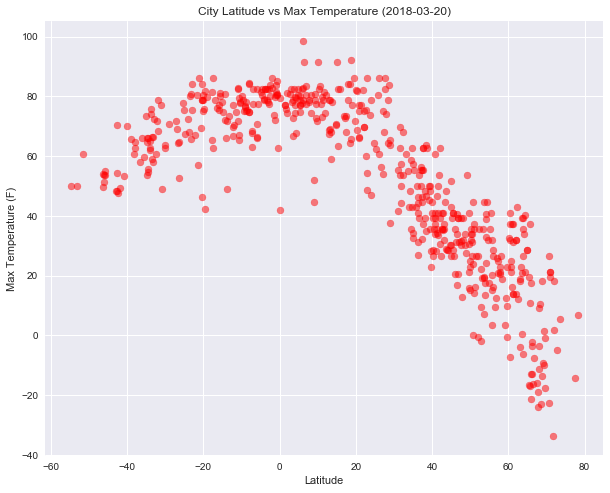

In [9]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

# Latitude vs. Humidity Plot


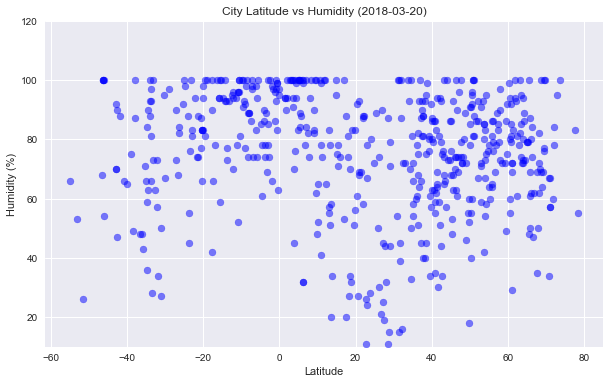

In [10]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

 # Latitude vs. Cloudiness Plot

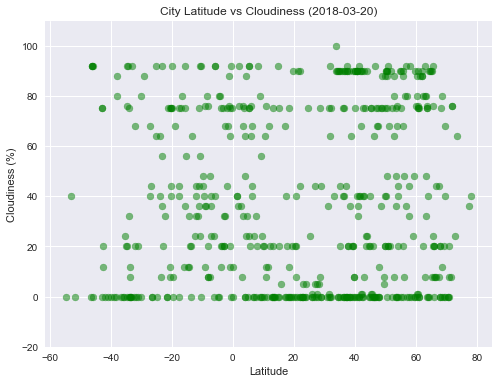

In [11]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

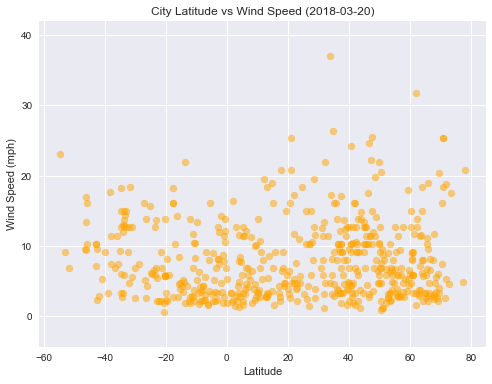

In [12]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()